### Task 1: Create a function that takes these parameters
1. Number of circle(s):

2. Noise:
- evenly spaced
- not evenly spaced
- extra noise

3. placement of the circle(s):
- not touching each other
- bearly touching each other
- venn diagram


In [5]:
# # Experimenting 
# from sklearn.datasets import make_circles
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# n_samples = 100
# noise = 0.05

# features, labels = make_circles(n_samples=n_samples, noise=noise)
# df = pd.DataFrame(dict(x=features[:,0], y=features[:,1], label=labels))
# print(df.head())

          x         y  label
0  0.738841  0.304580      1
1  0.253213 -0.731332      1
2 -0.467067 -0.681436      1
3 -1.080149 -0.062266      0
4 -1.020130 -0.152262      0


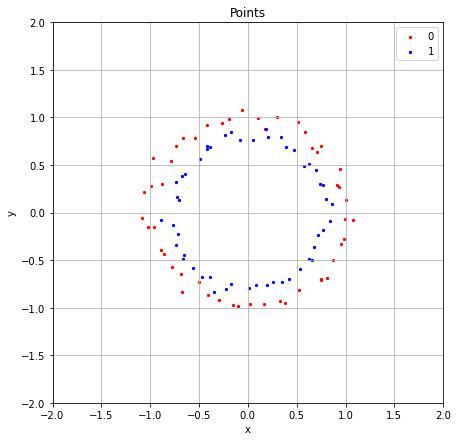

In [6]:
# # Collect the points together by label, either 0 or 1
# grouped = df.groupby('label')

# colors = {0:'red', 1:'blue'}
# fig, ax = plt.subplots(figsize=(7,7))
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', marker='.', label=key, color=colors[key])
# plt.title('Points')
# plt.xlim(-2, 2)
# plt.ylim(-2, 2)
# plt.grid()
# plt.show()

In [7]:
# points = df.drop(columns=df.columns[-1])
# points_array = points.to_numpy() #change df to np.array to apply TDA functions

In [1]:
import numpy as np
def sample_sphere(n, dim = 3) :
    # uniform sampling of the sphere (works in any dim)
    points = np.random.randn(n, dim)
    points /= np.linalg.norm(points, axis=1)[:,None] #puts everything into unit sphere >> unifrom distribution of 
    return points

points = sample_sphere(100, dim=2)

In [2]:
# Start with Rips filtration: compute Rips PDs (PH0, PH1, PH2) for this point cloud
from gtda.homology import VietorisRipsPersistence

VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])
diagrams = VR.fit_transform([points])[0] # take single element from list
print('Shape of diagrams is {}'.format(diagrams.shape))

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Shape of diagrams is (111, 3)


In [43]:
def nbpts_PH(diagrams) :
    ph0 = len(np.where(np.isclose(diagrams[:,2],0))[0])
    ph1 = len(np.where(np.isclose(diagrams[:,2],1))[0])
    ph2 = len(np.where(np.isclose(diagrams[:,2],2))[0])
    return ph0, ph1, ph2

def get_PH_dim(diagrams,dim) :
    ph0, ph1, ph2 = nbpts_PH(diagrams)
    if dim == 0 :
        diag = diagrams[:ph0, :2]
    if dim == 1 :
        diag = diagrams[ph0:ph0+ph1, :2]
    if dim == 2 :
        diag = diagrams[ph0 + ph1:, :2]
    return diag

def get_PH_alldims(diagrams):
    ph0, ph1, ph2 = nbpts_PH(diagrams)
    PH0 = diagrams[:ph0, :2]
    PH1 = diagrams[ph0:ph0+ph1, :2]
    PH2 = diagrams[ph0 + ph1:, :2]
    return PH0, PH1, PH2

In [44]:
ph0, ph1, ph2 = nbpts_PH(diagrams)
PH0, PH1, PH2 = get_PH_alldims(diagrams)

In [45]:
from gtda.plotting import plot_diagram as plot_diagrams_plotly, plot_point_cloud as plot_points_plotly
# Functions to plot persistence diagrams

def plot_diagrams(diagrams, style = 'sep', diagonal = False) :
    PH_list = list(get_PH_alldims(diagrams))
    col_list = ['#E11033','#1A0DAB','#FF7900']# FBB117
    
    ph2 = len(PH_list[2])
    if ph2 != 0 :
        list_dims = [0,1,2]
        figsize = (10, 3.5)
    else :
        list_dims = [0,1]
        figsize = (6.5,3.5)
    
    if diagonal == False :
        for dim in list_dims :
            PHdim = PH_list[dim]
            PH_list[dim] = PHdim[ PHdim[:,0] < PHdim[:,1] ]
            
    if style == 'sep' :
        fig, axes = plt.subplots(1,len(list_dims), figsize = figsize)
        for dim in list_dims :
            ax = axes[dim]
            xmin = PH_list[dim][:,0].min()
            ymax = PH_list[dim][:,1].max()
            ax.plot([xmin, ymax],[xmin, ymax], c = 'k', alpha = .2, zorder = 1)
            ax.scatter(PH_list[dim][:,0], PH_list[dim][:,1], c = col_list[dim], s = 5, zorder = 2)
            ax.set_aspect('equal')
            ax.set_title('PH{}'.format(dim))
            ax.set_xlabel('birth')
            ax.set_ylabel('death')
        fig.tight_layout()
        plt.show()
        
    if style == 'tog' :
        fig = plt.figure(figsize = (4.5,4.5))
        xmin = min( [ PH_list[dim][:,0].min() for dim in [0,1,2] ] )
        ymax = max( [ PH_list[dim][:,1].max() for dim in [0,1,2] ] )
        plt.plot([xmin, ymax],[xmin, ymax], c = 'k',alpha = .2, label='_nolegend_')
        for dim in list_dims :
            plt.scatter(PH_list[dim][:,0], PH_list[dim][:,1], c = col_list[dim], s = 10)
        plt.legend(['PH0','PH1','PH2'])
        fig.tight_layout()
        plt.show()
        
from matplotlib.lines import Line2D

def plot_bars(diagrams, diagonal = False) :
    ph0, ph1, ph2 = nbpts_PH(diagrams)
    PH_list = list(get_PH_alldims(diagrams))
    
    if ph2 != 0 :
        list_dims = [0,1,2]
    else :
        list_dims = [0,1]
        
    if diagonal == False :
        for dim in list_dims :
            PHdim = PH_list[dim]
            PH_list[dim] = PHdim[ PHdim[:,0] < PHdim[:,1] ]
    
    col_list = ['#E11033','#1A0DAB','#FF7900']# FBB117
    lab_list = ['PH0','PH1','PH2']
    xmax = max([PH_list[dim][:,1].max() for dim in list_dims ] )
    delta_y = .01
    big_delta_y = .1
    ymax = delta_y*(ph0 + ph1 + ph2) + 2*big_delta_y
    
    fig = plt.figure(figsize = (8, 5))
    y = 0 # increment the position of the bar
    for dim in list_dims :
        for bar in PH_list[dim] :
            birth, death = bar
            plt.plot([birth, death],[y, y], c = col_list[dim], linewidth = 1)
            y += delta_y
        y += big_delta_y
    plt.axis('equal')
    plt.yticks([])
    plt.xlim([-10*delta_y,xmax+10*delta_y])
    plt.ylim([-10*delta_y,ymax+10*delta_y])
    plt.ylabel('persistence bars')
    plt.xlabel('filtration value')
    fig.tight_layout()
    legend_elements = [ Line2D([0], [0], color=col_list[dim], lw=1, label=lab_list[dim]) for dim in list_dims]
    plt.legend(handles=legend_elements)
    plt.show()

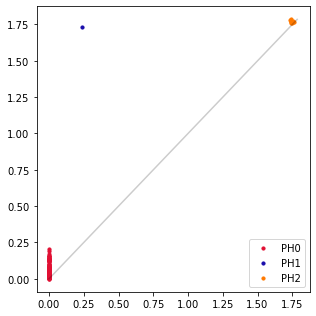

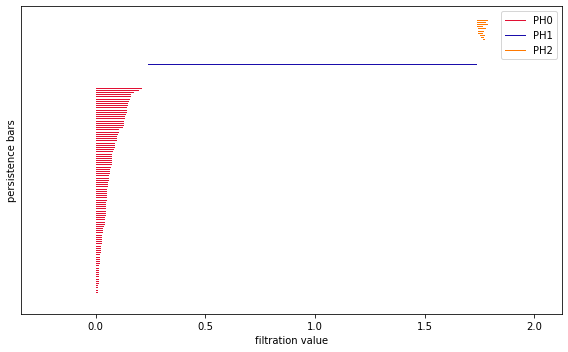

In [46]:
# Plot diagrams: several ways to visualize them

# By default, plot_diagrams() and plot_bars() ignore diagonal elements 
# for which birth = death (unless you specify diagonal = True)

# PD as scattered points (birth, death) with death >= birth
plot_diagrams(diagrams, style = 'tog') 
# style = 'tog' to plot 3 homology dimensions together, style = 'sep' to plot separately

# PD as persistence bars [ (birth, y) --- (death, y) ]
plot_bars(diagrams)

# Uncomment to use giotto-tda's default plotting method
# based on Plotly which enables interactive 2D and 3D plots
# good for small data but REALLY SLOW for large point clouds
# and does not allow to interact with several datasets at a time

plot_diagrams_plotly(diagrams)

In [2]:
import matplotlib.pyplot as plt

def plot_points(points) :
    if points.shape[1] == 2 :
        plt.figure()
        plt.scatter(points[:,0], points[:,1], s=5)
        plt.axis('equal')
        plt.show()
    if points.shape[1] == 3 :
        ax = plt.axes(projection='3d')
        ax.scatter3D(points[:,0], points[:,1], points[:,2], c=points[:,2], cmap='autumn')
        ##ax.set_aspect('equal') # does not work
        set_axes_equal_3D(ax)
        plt.show()

In [58]:
import numpy as np
def sample_sphere(n, dim = 3) :
    # uniform sampling of the sphere (works in any dim)
    points = np.random.randn(n, dim)
    points /= np.linalg.norm(points, axis=1)[:,None] #puts everything into unit sphere >> unifrom distribution of 
    return points

points = sample_sphere(100, dim=2)

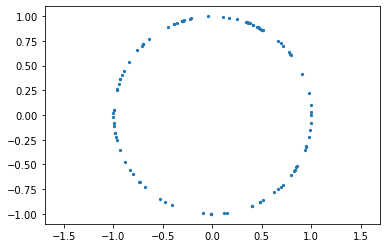

In [59]:
plot_points(points)

In [60]:
VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])
diagrams = VR.fit_transform([points])[0]
ph0, ph1, ph2 = nbpts_PH(diagrams)
PH0, PH1, PH2 = get_PH_alldims(diagrams)

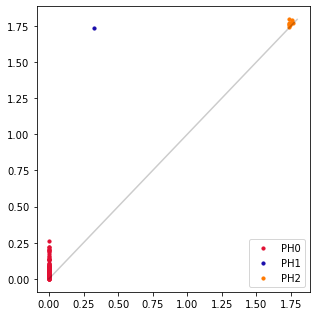

In [61]:
plot_diagrams(diagrams, style = 'tog') 

this is for sample size:20


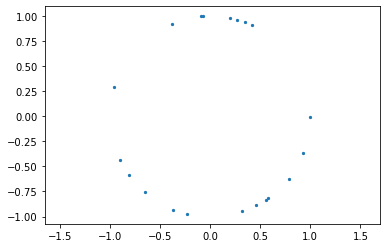

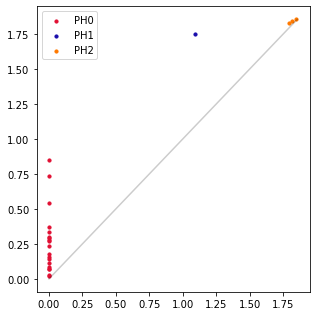

this is for sample size:70


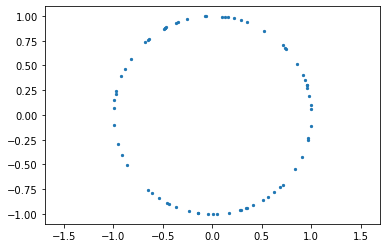

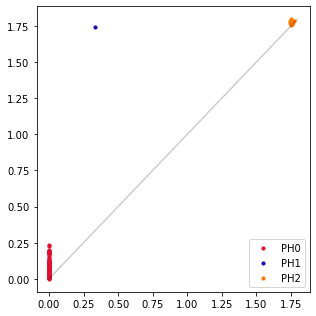

this is for sample size:150


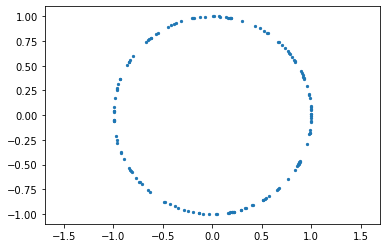

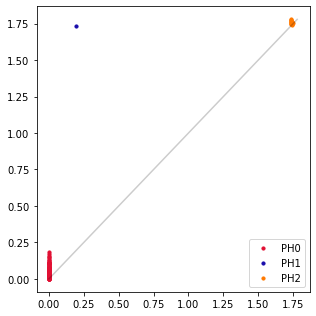

this is for sample size:500


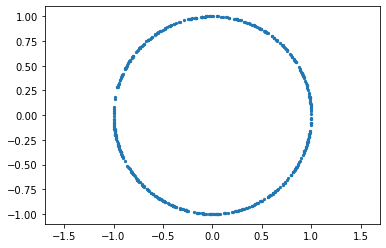

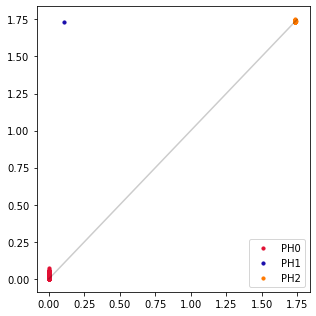

this is for sample size:1000


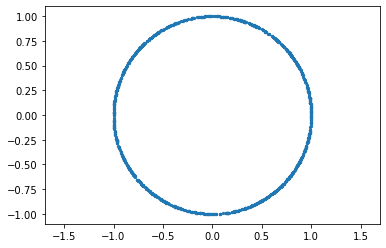

In [62]:
# samples = [20, 70, 150, 500]

# for e in samples:
#     print("this is for sample size:" + str(e))
#     points = sample_sphere(e, dim=2)
#     plot_points(points)
#     VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])
#     diagrams = VR.fit_transform([points])[0]
#     ph0, ph1, ph2 = nbpts_PH(diagrams)
#     PH0, PH1, PH2 = get_PH_alldims(diagrams)
#     plot_diagrams(diagrams, style = 'tog') 

In [3]:
import numpy as np
def sample_sphere(n, dim = 3) :
    # uniform sampling of the sphere (works in any dim)
    points = np.random.randn(n, dim)
    points /= np.linalg.norm(points, axis=1)[:,None] #puts everything into unit sphere >> unifrom distribution of 
    return points

points = sample_sphere(100, dim=2)


In [5]:
#plot_points(points)
print('Shape of points_df is {}'.format(points.shape))

Shape of points_df is (100, 2)


In [57]:
A = [[1, 0], 
    [-1, 2]]
    #create matrix A (linear transformation)

points_A = np.matmul(points,A) 

In [68]:
translation = [2,5]
from numpy import matlib
t_matrix = matlib.repmat(translation, 100,1)


In [75]:
points_B = points + t_matrix

In [76]:
new_points = np.concatenate((points_B, points_A), axis=0)

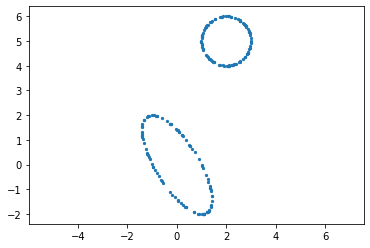

In [77]:
plot_points(new_points)

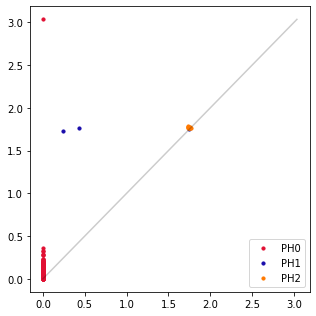

In [78]:
VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])
diagrams = VR.fit_transform([new_points])[0]
ph0, ph1, ph2 = nbpts_PH(diagrams)
PH0, PH1, PH2 = get_PH_alldims(diagrams)
plot_diagrams(diagrams, style = 'tog') 